# Comparing results with baseline and chance level

In this notebook, we present how to compare the statistical performance of a
model to a minimal baseline.

Indeed, in the previous notebook, we compared the testing error by
taking into account the target distribution. A good practice is to compare
the testing error with a dummy baseline and the chance level. In
regression, we could use the `DummyRegressor` and predict the mean target
without using the data. The chance level can be determined by permuting the
labels and check the difference of result.

Therefore, we will conduct experiment to get the score of a model and the two
baselines. We will start by loading the California housing dataset.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

In [1]:
from sklearn.datasets import fetch_california_housing

data, target = fetch_california_housing(return_X_y=True, as_frame=True)
target *= 100  # rescale the target in k$

Across all evaluations, we will use a `ShuffleSplit` cross-validation.

In [2]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=30, test_size=0.2, random_state=0)

We will start by running the cross-validation for the decision tree
regressor which is our model of interest. Besides, we will store the
testing error in a pandas series.

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate

regressor = DecisionTreeRegressor()
result_regressor = cross_validate(regressor, data, target,
                                  cv=cv, scoring="neg_mean_absolute_error",
                                  n_jobs=-1)

errors_regressor = pd.Series(-result_regressor["test_score"],
                             name="Regressor error")

In [8]:
errors_regressor

0     46.782357
1     46.618795
2     44.506848
3     43.956216
4     47.848420
5     44.733737
6     43.986497
7     44.738388
8     45.521478
9     44.738653
10    47.108960
11    46.357016
12    45.802632
13    45.116322
14    46.911302
15    44.178625
16    45.907193
17    46.434654
18    45.001542
19    46.742990
20    43.365326
21    45.495582
22    45.726666
23    46.665207
24    46.047307
25    46.051909
26    44.606322
27    46.282598
28    45.121258
29    48.354236
Name: Regressor error, dtype: float64

Then, we will evaluate our first baseline. This baseline is called a dummy
regressor. This dummy regressor will always predict the mean target computed
on the training. Therefore, the dummy regressor will never use any
information regarding the data `data`.

In [4]:
from sklearn.dummy import DummyRegressor

dummy = DummyRegressor()
result_dummy = cross_validate(dummy, data, target,
                              cv=cv, scoring="neg_mean_absolute_error",
                              n_jobs=-1)
errors_dummy = pd.Series(-result_dummy["test_score"], name="Dummy error")

In [9]:
errors_dummy

0     90.713153
1     90.539353
2     91.941912
3     90.213912
4     92.015862
5     90.542490
6     89.757566
7     92.477244
8     90.947952
9     91.991373
10    92.023571
11    90.556965
12    91.539567
13    91.185225
14    92.298971
15    91.084639
16    90.984471
17    89.981744
18    90.547140
19    89.820219
20    91.768721
21    92.305556
22    90.503017
23    92.147974
24    91.386320
25    90.815660
26    92.216574
27    90.107460
28    90.620318
29    91.165331
Name: Dummy error, dtype: float64

Finally, we will evaluate the statistical performance of the second baseline.
This baseline will provide the statistical performance of the chance level.
Indeed, we will train a decision tree on some training data and evaluate the
same tree on data where the target vector has been randomized.

In [5]:
from sklearn.model_selection import permutation_test_score

regressor = DecisionTreeRegressor()
score, permutation_score, pvalue = permutation_test_score(
    regressor, data, target, cv=cv, scoring="neg_mean_absolute_error",
    n_jobs=-1, n_permutations=30)
errors_permutation = pd.Series(-permutation_score, name="Permuted error")

In [11]:
permutation_test_score?

In [10]:
errors_permutation

0     129.032410
1     129.398369
2     128.900235
3     129.202796
4     128.835742
5     129.253929
6     130.017591
7     128.861625
8     129.033270
9     129.462761
10    129.361596
11    129.841664
12    128.837298
13    129.285179
14    129.230618
15    129.135477
16    129.100897
17    129.109746
18    128.949897
19    129.402281
20    129.247234
21    129.028287
22    129.291383
23    129.633389
24    129.266160
25    129.526317
26    129.620507
27    129.210742
28    128.903540
29    129.347662
Name: Permuted error, dtype: float64

Finally, we plot the testing errors for the two baselines and the
actual regressor.

In [6]:
final_errors = pd.concat([errors_regressor, errors_dummy, errors_permutation],
                         axis=1)

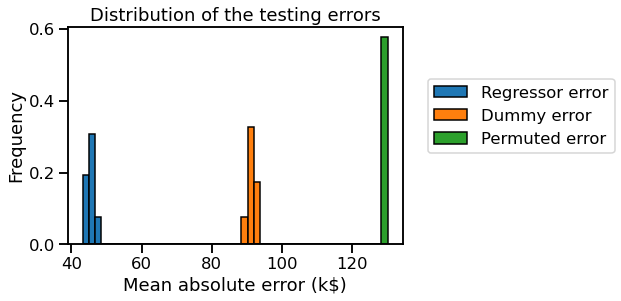

In [7]:
import matplotlib.pyplot as plt

final_errors.plot.hist(bins=50, density=True, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Mean absolute error (k$)")
_ = plt.title("Distribution of the testing errors")

We see that even if the statistical performance of our model is far from
being good, it is better than the two baselines. Besides, we see that the
dummy regressor is better than a chance level regressor.

In practice, using a dummy regressor might be sufficient as a baseline.
Indeed, to obtain a reliable estimate the permutation of the target should
be repeated and thus this method is costly. However, it gives the true
chance level.